## Описание проекта 

  В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.<br> 
Нам нужно выявить определяющие успешность игры закономерности. Что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<br> 
Перед нами данные до 2016 года. Планируется кампания на 2017-й.

**Цели исследования**
1) Определить для пользователя каждого региона (NA, EU, JP):

  * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  * Самые популярные жанры (топ-5). Поясните разницу.
  * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
2) Проверить две гипотезы:

  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * Средние пользовательские рейтинги жанров Action и Sports разные.
    
**Ход исследования**

Исследование пройдёт в пять этапов:
 1. Описание проекта.
 2. Предобработка данных.
 3. Анализ данных.
 4. Проверка гипотез.
 5. Общий вывод. 

**Описание данных**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Импортируем необходимые библиотеки и сохраним необходимые данные в таблицах

In [1]:
#импорт библиотек Pandas и Matplotlib и Numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
#чтение файла с данными и сохранение в df 
df = pd.read_csv('/datasets/games.csv')

Проверим информацию в таблице

In [3]:
#посмотрим таблицу 'df'
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
#посмотрим информацию о таблице 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#посмотрим статистики таблицы df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Вывод 
В столбцах: 
* `Name`; 
* `Year_of_Release`; 
* `Genre`; 
* `Critic_Score`; 
* `User_Score`; 
* `Rating`;

таблицы df обнаружены пропуски.

У столбца `User_Score` нужно сменить тип данных со строки на тип float.

Так же во всех столбцах с типом float64, можно сменить тип на float32 для экономии памяти. 

Наименование столбцов несоответствующее, используется верхний регистр. 

## Предобработка данных

Заменим названия столбцов (приведите к нижнему регистру)

In [6]:
#перевод названий столбцов таблицы df в нижний регистр
df.columns= df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для возможности изменения типа столбца `user_score` заменим значения `tbd` на пропуски, т.к. `tbd` - это отсутствие оценки. Изменим тип данных со строчного, на вещественный float32.

In [7]:
#заменим значения 'tbd' на пропуски и изменим тип на float32
df.loc[(df['user_score'] == 'tbd'), 'user_score'] = np.NaN
df['user_score'] = df['user_score'].astype('float32')

Изменим тип данных столбцов с float64, на float32

In [8]:
#изменим тип на float32
df['na_sales'] = df['na_sales'].astype('float32')
df['eu_sales'] = df['eu_sales'].astype('float32')
df['jp_sales'] = df['jp_sales'].astype('float32')
df['other_sales'] = df['other_sales'].astype('float32')
df['critic_score'] = df['critic_score'].astype('float32')

Посмотрим долю пропущенных значений в столбцах

In [9]:
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

Значимое количество пропусков в столбцах с оценками игр `critic_score`, `user_score` и возрастным рейтингом `rating`. 
Заполнять оценки игр средними или медианными значениями бессмыслено, так как оценки зависят только от конкретной игры.
При необходимости возрастной рейтинг `rating` можно попробовать восстановить по жанру `genre`. Остальные пропуски не более 2% можно не заполнять. 


Скорее всего пропуски в столбцах `critic_score`, `user_score` и `rating` вызваны тем, что до определенного момента не существовало практики выставелния и подсчета оценки игр и возрастного рейтинга игр.

Посчитаем суммарные продажи в мире и запишем в столбец `all_sales`

In [10]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985.0,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN,40.240002
2,Mario Kart Wii,Wii,2008.0,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009.0,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN,31.380001
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN,0.010000
16711,LMA Manager 2007,X360,2006.0,Sports,0.000000,0.010000,0.00,0.00,NaN,NaN,NaN,0.010000
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN,0.010000
16713,Spirits & Spells,GBA,2003.0,Platform,0.010000,0.000000,0.00,0.00,NaN,NaN,NaN,0.010000


### Вывод

* Заменили типа столбца `user_score` на float32;
* Заменили значения tbd в столбце `user_score` на пропуски, т.к. tbd - это отсутствие оценки; 
* Заменили тип данных столбцов с float64, на float32;
* Посчитали суммарные продажи в мире в столбеце `all_sales`.

Значимое количество пропусков в столбцах с оценками игр `critic_score`, `user_score` и возрастным `рейтингом rating`. Заполнять оценки игр средними или медианными значениями бессмысленно, так как оценки зависят только от конкретной игры. Остальные пропуски не более 2% можно не заполнять.

Скорее всего пропуски в столбцах `critic_score`, `user_score` и `rating` вызваны тем, что до определенного момента не существовало практики выставления и подсчета оценки игр и возрастного рейтинга игр.



## Исследовательский анализ данных

Посмотрим на количество выпускаемых игр в разные годы

In [11]:
year_of_release = df.groupby('year_of_release')['name'].agg('count')
year_of_release

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Построим график количества выпускаемых игр в разные годы

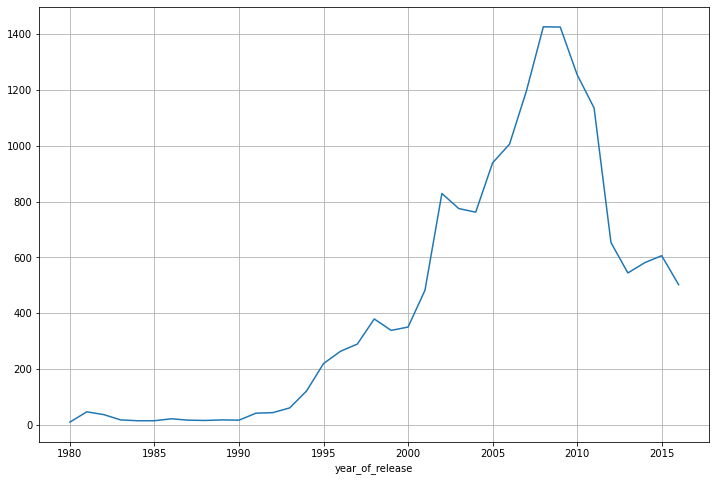

In [12]:
year_of_release.plot(figsize=(12,8), grid=True);

Количество игр до 94-95 года сильно меньше, чем после 95

Посмотрим, как менялись продажи по платформам

In [13]:
q = df.pivot_table(index=['platform','year_of_release'], values=['all_sales'], aggfunc=('sum')).sort_values(by='all_sales', ascending=False)
q.head(20) 

all_sales
platform year_of_release            
PS2      2004.0           211.809998
Wii      2009.0           206.970001
PS2      2002.0           205.380005
         2003.0           184.309998
Wii      2008.0           171.320007
X360     2010.0           170.029999
PS       1998.0           169.490005
PS2      2001.0           166.430008
         2005.0           160.660004
PS3      2011.0           156.779999
Wii      2007.0           152.770004
DS       2007.0           146.940002
         2008.0           145.309998
PS       1999.0           144.529999
X360     2011.0           143.839996
PS3      2010.0           142.169998
Wii      2006.0           137.149994
PS       1997.0           136.169998
X360     2008.0           135.259995
PS3      2009.0           130.930008

In [14]:
df.pivot_table(index=['platform'], values=['all_sales'], aggfunc=('sum')).sort_values(by='all_sales', ascending=False).head(10)

,all_sales
platform,
PS2,1255.770020
X360,971.419983
PS3,939.649963
Wii,907.510010
DS,806.119995
PS,730.859985
GBA,317.850006
PS4,314.140015
PSP,294.049988


Максимальные продажи по годам у PS2, Wii, X360, PS, PS3 и DS

Построим график зависимости продаж от платформы

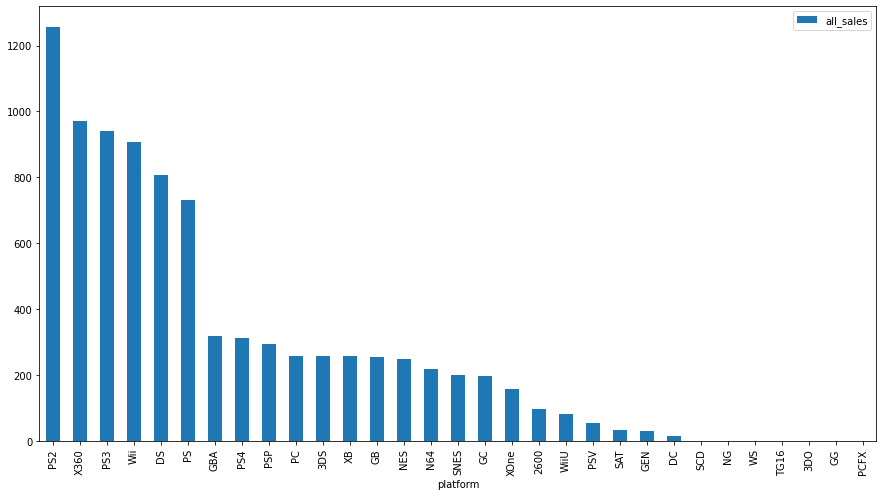

In [15]:
df.pivot_table(index=['platform'], values=['all_sales'], aggfunc=('sum')).sort_values(by='all_sales', ascending=False).plot.bar(figsize=(15,8));

Построим график продаж по годам, для платформ с наибольшими продажами

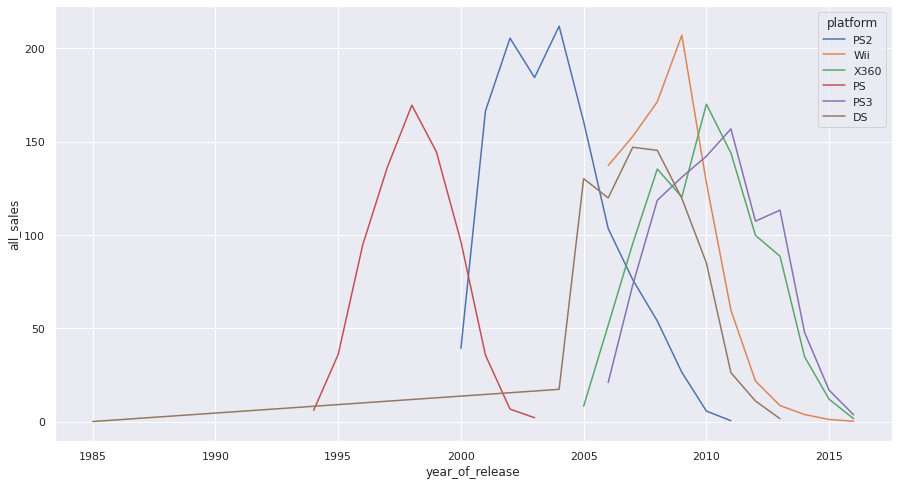

In [16]:
t = q.query('platform == ["PS2", "Wii", "X360", "PS", "PS3", "DS"]')
sns.set(rc = {'figure.figsize':(15,8)} )
sns.lineplot(data=t, x='year_of_release', y='all_sales', hue='platform');

У платформы "DS" есть выброс с 1985 года

Построим график зависимости платформы от года выпуска игры

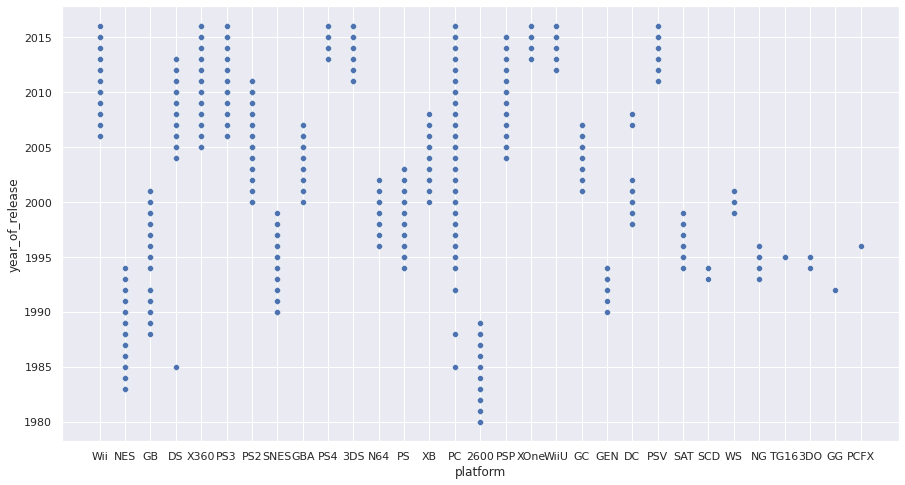

In [17]:
plt.figure(figsize=(15,8))
grid = sns.scatterplot(data=df, x = "platform", y = "year_of_release") 

Исходя из графика актуальность платформ как правило не превышает 10 лет

Посмотрим количество выставленных играм оценок по годам

In [18]:
critic = df.groupby('year_of_release')['critic_score', 'user_score'].agg('count')
critic

,critic_score,user_score
year_of_release,,
1980.0,0,0
1981.0,0,0
1982.0,0,0
1983.0,0,0
1984.0,0,0
1985.0,1,1
1986.0,0,0
1987.0,0,0
1988.0,1,1


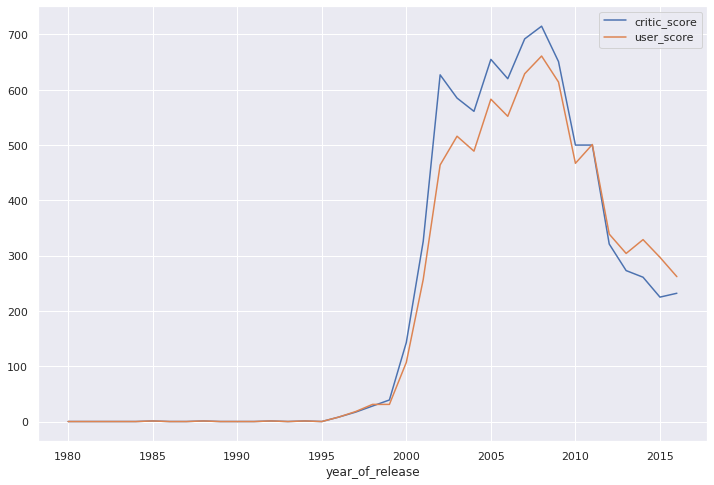

In [19]:
critic.plot(figsize=(12,8), grid=True);

Оценки практически не встречаются до 96 года и их количество заметно возрастает после 2000 года 

Посмотрим, как часто играм присваивался возрастной рейтинг по годам 

In [20]:
df.groupby('year_of_release')['rating'].agg('count')

year_of_release
1980.0       0
1981.0       0
1982.0       0
1983.0       0
1984.0       0
1985.0       1
1986.0       0
1987.0       0
1988.0       1
1989.0       0
1990.0       0
1991.0       0
1992.0       2
1993.0       0
1994.0       1
1995.0       0
1996.0       7
1997.0      19
1998.0      32
1999.0      42
2000.0     148
2001.0     339
2002.0     655
2003.0     613
2004.0     598
2005.0     706
2006.0     678
2007.0     821
2008.0     981
2009.0    1011
2010.0     799
2011.0     703
2012.0     355
2013.0     316
2014.0     345
2015.0     315
2016.0     280
Name: rating, dtype: int64

Так же данных о возрастном рейтинге практически нет до 96 года, количество данных о рейтинге  заметно возрастает после 2000 года

**Определение актуального периода**

Для дальнейшего анализ будем использовать данные, только для актуальных платформ, актуальными платформами остались только те, на которые в 2016 году выходили игры. Так же ограничим дату 2013 годом, так как актуальность платформ не превышает 10 лет и до 2000х годов данных о оценках и рейтингах крайне мало.  

Посмотрим на какие платформы выходили игры в 2016 году

In [21]:
df1 = df.query('year_of_release >= 2016')
df1['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

Сделаем срез таблицы df по актуальным платформам и по году, т.к платформа PC представлена во всем временном диапазоне

In [22]:
df = df.query("platform == ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'] and year_of_release >= 2013")
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.049999
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.270000
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.630000
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.599999
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.620001
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.010000
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.010000
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.010000
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.010000


Посчитаем суммарную прибыль по актуальным платформам

In [23]:
df.pivot_table(index=['platform'], values=['all_sales'], aggfunc=('sum')).sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,314.140015
PS3,181.429993
XOne,159.320007
3DS,143.250000
X360,136.800003
WiiU,64.629997
PC,39.430000
PSV,32.989998
Wii,13.660000


Построим графики прибыли по годам на разных платформах

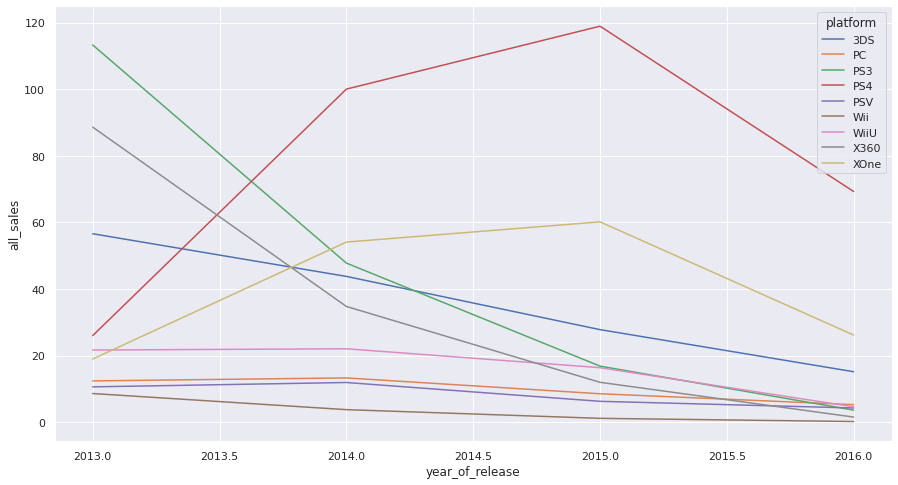

In [24]:
#общий график прибыли по годам на разных платформах
t = df.pivot_table(index=['platform','year_of_release'], values=['all_sales'], aggfunc=('sum'))
sns.lineplot(data=t, x='year_of_release', y='all_sales', hue='platform');

In [25]:
#функция построения графиков прибыли по годам на разных платформах на входе название платформы, на выходе продажи по годам
def plot_sales(query):
    return (df
            .query(query)
            .pivot_table(index=['year_of_release'], values=['all_sales'], aggfunc=('sum'))
            .plot(grid=True, figsize=(12,5))
           )

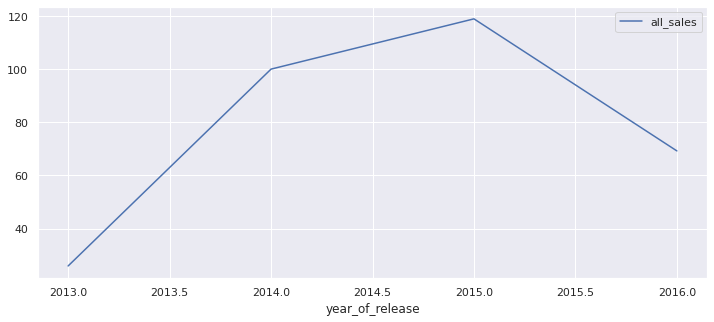

In [26]:
#графиков прибыли по годам для PS4
plot_sales('platform == "PS4"');

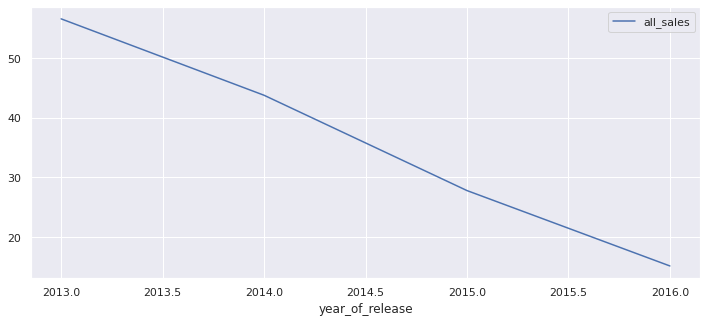

In [27]:
#графиков прибыли по годам для 3DS
plot_sales('platform == "3DS"');

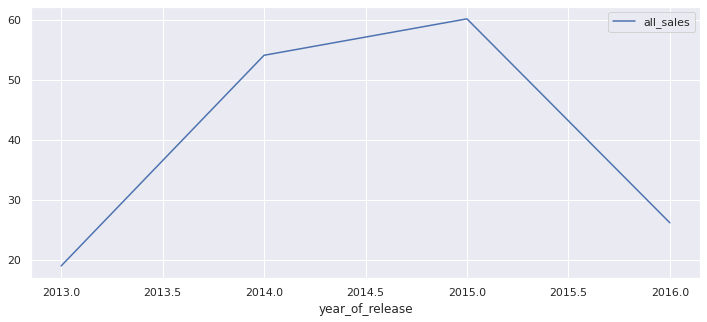

In [28]:
#графиков прибыли по годам для XOne
plot_sales('platform == "XOne"');

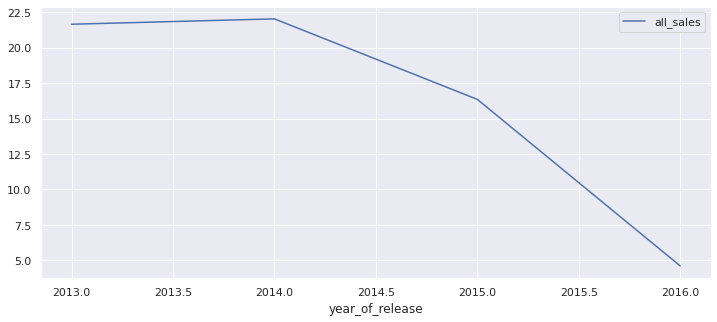

In [29]:
#графиков прибыли по годам для WiiU
plot_sales('platform == "WiiU"');

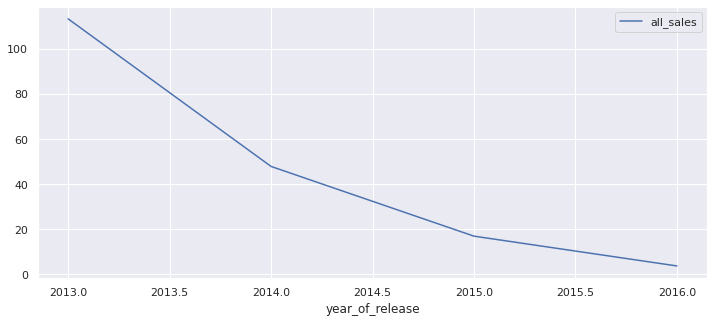

In [30]:
#графиков прибыли по годам для PS3
plot_sales('platform == "PS3"');

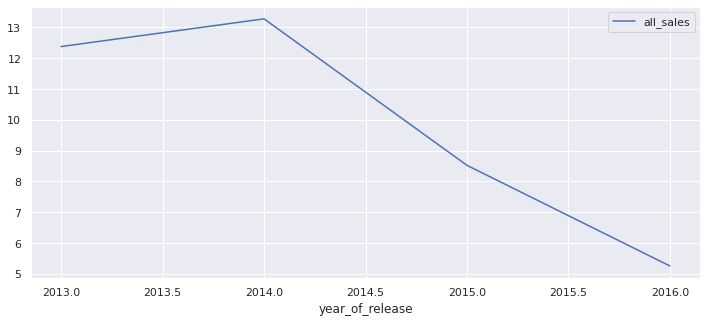

In [31]:
#графиков прибыли по годам для PC
plot_sales('platform == "PC"');

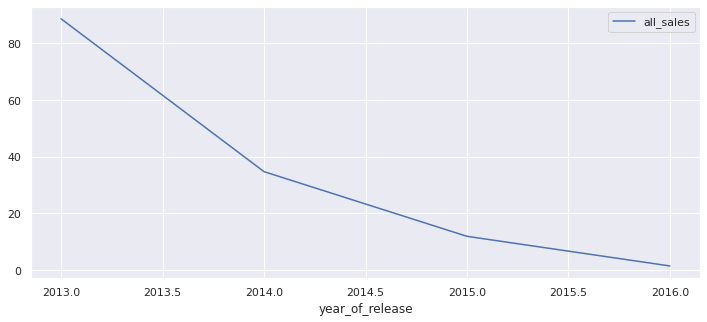

In [32]:
#графиков прибыли по годам для X360
plot_sales('platform == "X360"');

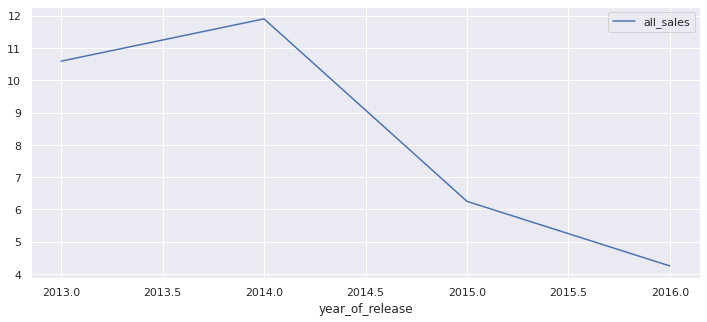

In [33]:
#графиков прибыли по годам для PSV
plot_sales('platform == "PSV"');

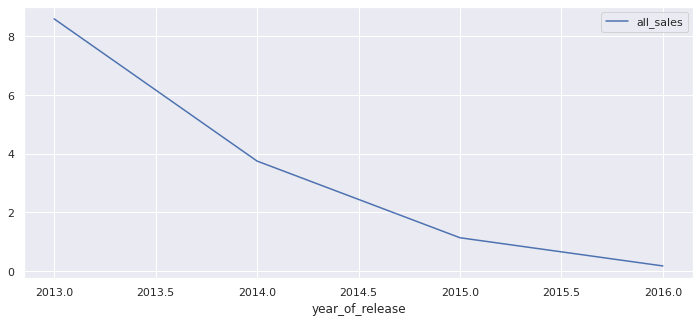

In [34]:
#графиков прибыли по годам для Wii
plot_sales('platform == "Wii"');

Посчитаем прибыль за 2016 год, для актуальных платформ

In [35]:
(df
.query("year_of_release == 2016")
.pivot_table(index=['platform'], values=['all_sales'], aggfunc=('sum'))
.sort_values(by='all_sales', ascending=False))

,all_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Продажи на всех платформах падают со временем, но у платформ 'PS4' и 'XOne' самые большие суммарные продажи в 2016, более 25 миллионов

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

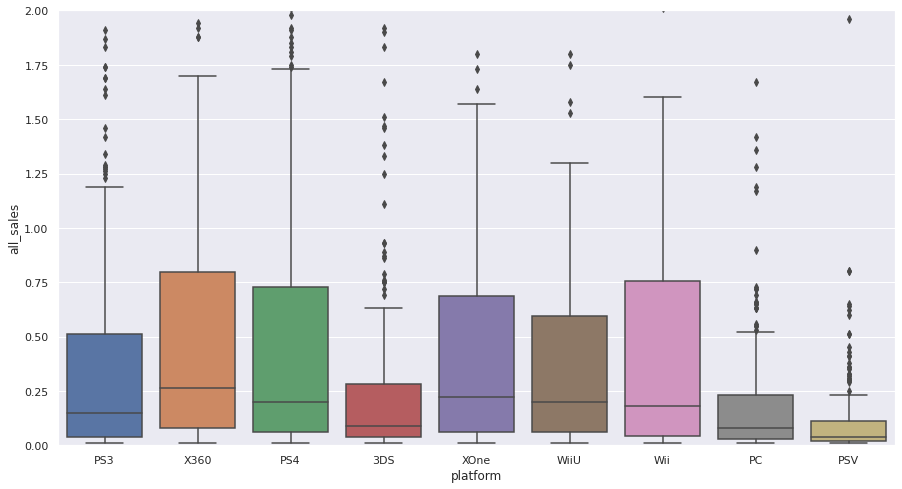

In [36]:
sns.boxplot(data=df, x='platform', y='all_sales');
plt.ylim(0, 2);

Четыре платформы с наибольшими значениями продаж, в период с 2013 по 2016 год, по верхним квантилям и максимальным значениям: X360, Wii, PS4, XOne.

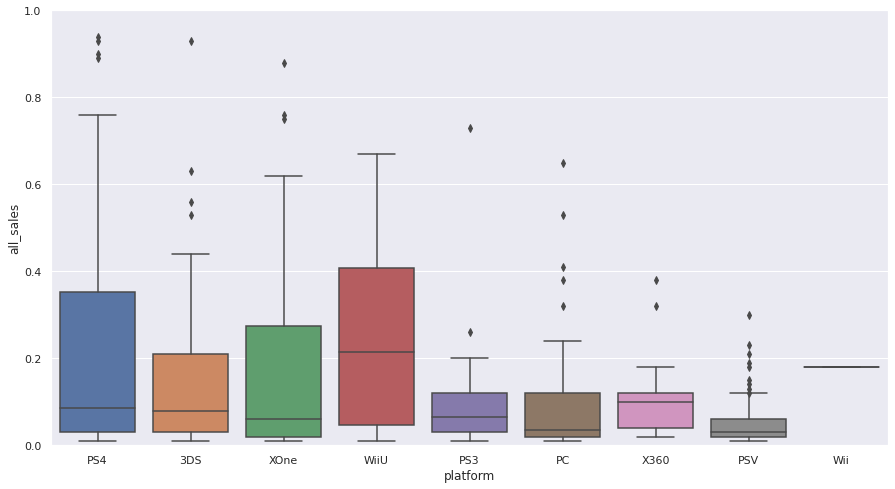

In [37]:
t=df.query('year_of_release == 2016')
sns.boxplot(data=t, x='platform', y='all_sales');
plt.ylim(0, 1);

1) По итогам 2016 года три платформы с наибольшими значениями продаж по верхним квантилям и максимальным значениям: WiiU, PS4 и XOne; 

2) Меньшее, относительно других платформ, падение продаж в 2016 году у WiiU;

3) Стабильно хорошие продажи на платформах PS4 и XOne;

4) Падают продажи на всех платформах.

Между нижним и верхним квантилем находятся продажи от 0 до 150 миллионов.

Среди платформ с наибольшими продажами по квантилям:
* Wii до 150 миллионов;
* X360 lj до 125 миллионов;
* PS3 до 120 миллионов; 
* PS4 до 100 миллионов; 
* 3DS до 55 миллионов; 
* XOne до 55 миллионов;


но у платформ продажи в 2016 сильно уменьшились, так же эти платформы относительно старые, что может свидетельствовать о уменьшающейся актуальности данных платформ.

Продажи платформ с наибольшими продажами по квантилям за 2016 год:
* Wii - 0.18 миллионов;
* X360 - 1.52 миллионов;
* PS3 - 3.60 миллионов;
* PS4	- 69.25 миллионов;
* 3DS - 15.14 миллионов;
* XOne - 26.15 миллионов;

По результатам исследования, наиболее актуальными платформами являются PS4 и XOne.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [38]:
#функция построения диаграммы рассеяния и подсчета корреляцию между отзывами пользователей и продажами
def user_sales(query):
    x = df.query(query)
    print('Корреляция:', x['user_score'].corr(x['all_sales']))
    x.plot(x='user_score', y='all_sales', kind='scatter', grid=True, alpha=0.5) 
           

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция: -0.031957105603966966


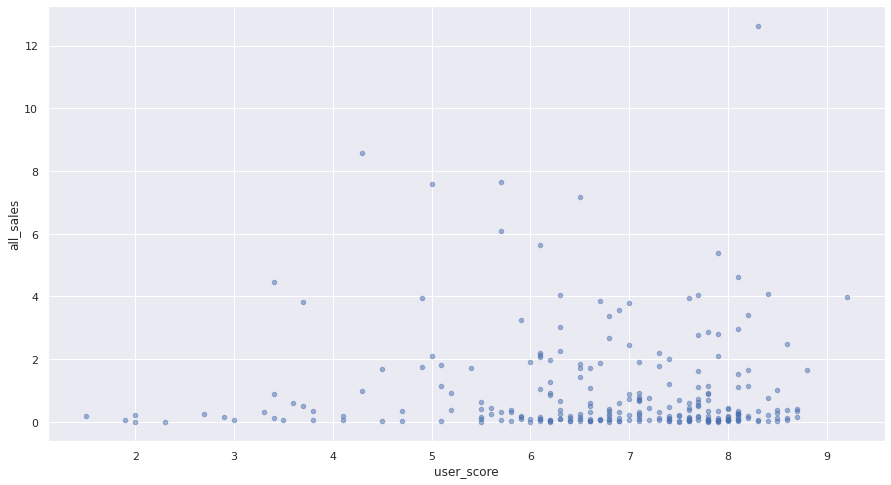

In [39]:
user_sales('platform == "PS4"');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция: -0.06892505829722281


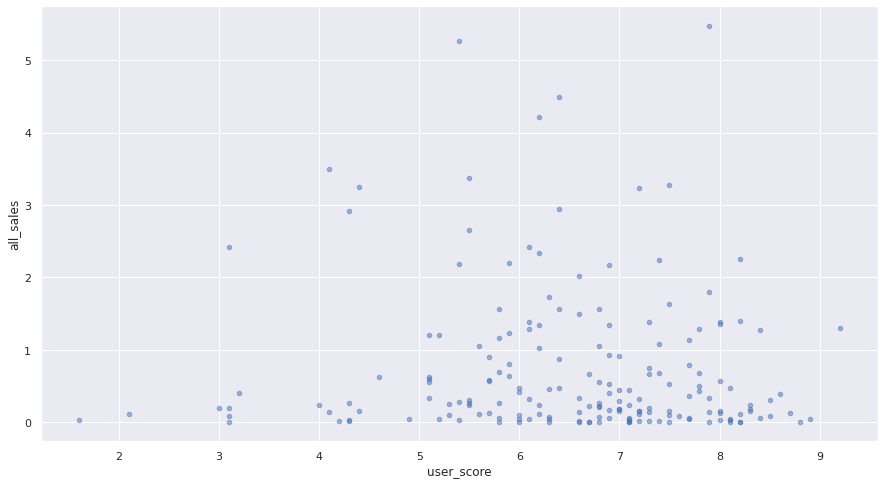

In [40]:
user_sales('platform == "XOne"');

In [41]:
#функция построения диаграммы рассеяния и подсчета корреляцию между отзывами критиков и продажами
def critic_sales(query):
    x = df.query(query)
    print('Корреляция:', x['critic_score'].corr(x['all_sales']))
    x.plot(x='critic_score', y='all_sales', kind='scatter', grid=True, alpha=0.5)           

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция: 0.40656790102834933


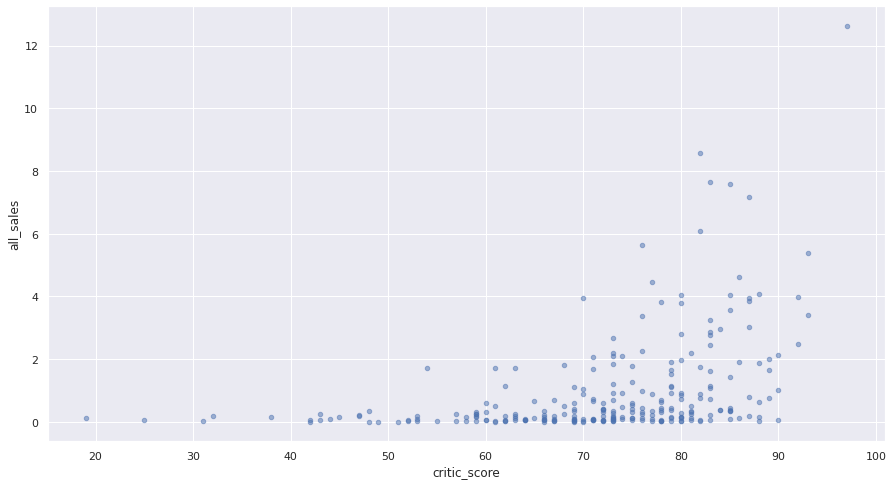

In [42]:
critic_sales('platform == "PS4"');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Корреляция: 0.41699832684400107


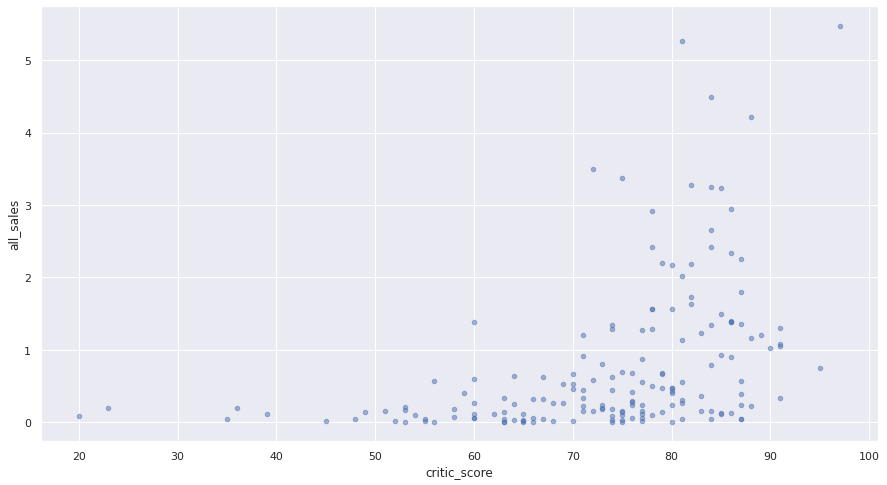

In [43]:
critic_sales('platform == "XOne"');

Между оценкой пользователей и количеством продаж в год линейной зависимости не выявлено, а между оценкой критиков и продажами есть средняя линейная зависимость, порядка 0.4. С увеличением оценки критика как правило увеличивается количество продаж в мире.

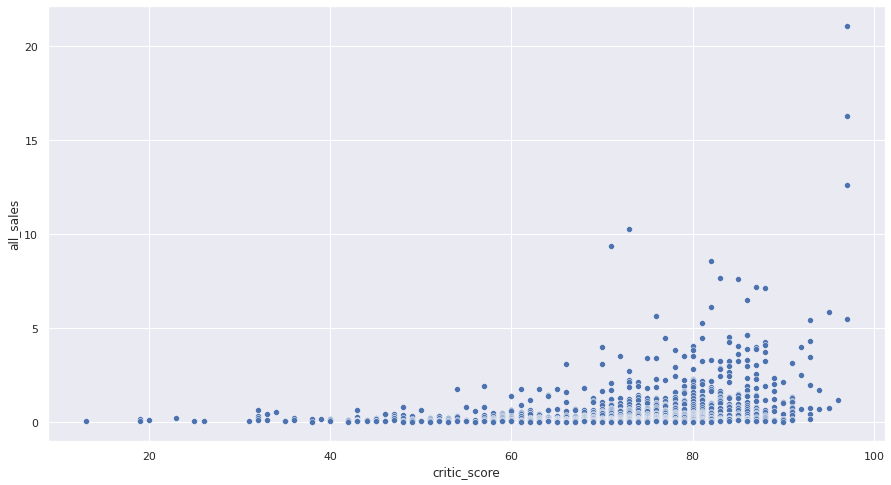

In [44]:
plt.figure(figsize=(15,8))
grid = sns.scatterplot(data=df, x = 'critic_score', y = 'all_sales') 

In [45]:
df['critic_score'].corr(df['all_sales'])

0.3137889120037685

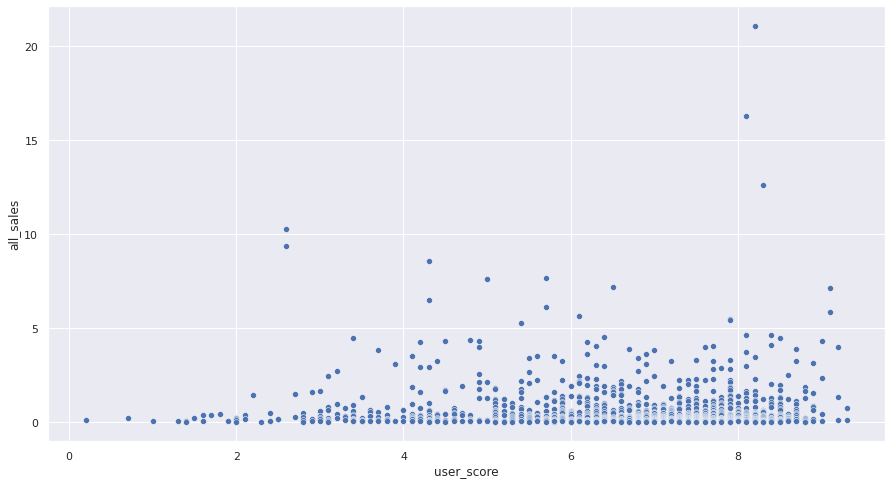

In [46]:
plt.figure(figsize=(15,8))
grid = sns.scatterplot(data=df, x = 'user_score', y = 'all_sales') 

In [47]:
df['user_score'].corr(df['all_sales'])

-0.003067514405641923

Среди всех актуальных платформ корреляция между оценками критиков и глобальными продажами не такая высокая, как у двух первых платформ PS4 и XOne

In [48]:
df.groupby('platform')['critic_score', 'user_score'].agg('mean')

,critic_score,user_score
platform,,
3DS,68.338028,6.976250
PC,75.550339,6.269678
PS3,70.198349,6.348387
PS4,72.091270,6.748249
PSV,71.636360,7.527273
Wii,NaN,5.257143
WiiU,71.642860,7.017500
X360,69.234566,5.993007
XOne,73.325447,6.521429


Видно, что шкала оценок критиков 100 бальная, а шкала оценок пользователей 10 бальная.

Оценки критиков и пользователей пропущены на одинаковых платформах одновременно.

Посмотрим на общее распределение игр по жанрам

In [49]:
#количество продаж по жанрам
q = df.pivot_table(index=['genre'], values=['name'], aggfunc=('count')).sort_values(by='name', ascending=False)
q.head(20)

,name
genre,
Action,752
Role-Playing,285
Adventure,211
Sports,208
Shooter,187
Misc,146
Racing,85
Fighting,79
Platform,72


In [50]:
#суммарный заработок по жанру
q = df.pivot_table(index=['genre'], values=['all_sales'], aggfunc='mean').sort_values(by='all_sales', ascending=False)
q.head(20)

,all_sales
genre,
Shooter,1.245882
Sports,0.720817
Platform,0.582500
Role-Playing,0.508281
Racing,0.469294
Fighting,0.446709
Misc,0.428562
Action,0.426210
Simulation,0.353279


Самый часто выпускаемые жанры: Action, Role-Playing, Adventure, Sports, Shooter.

В среднем лучшие продажи показывают жарны: Shooter, Sports, Platform, Fighting, Role-Playing.

Самые не популярные жанры это - Puzzle, Strategy, Platform, Simulation, Fighting.

Самые не прибыльные жанры это - Adventure, Strategy, Puzzle, Simulation, Action.

Самым интересным из популярных выглядит жанр Shooter, так как в рейтинге прибыльности он выше, чем в рейтинге количества.

Среди самых не популярных наиболее интересным выглядит Fighting.

### Портрет пользователя

Самые популярные платформы в мире (топ-5)

In [51]:
t = df.pivot_table(index=['platform'], values=['all_sales'], aggfunc='sum').sort_values(by='all_sales', ascending=False)
t['ratio_platform'] = round(t['all_sales']/t['all_sales'].sum()*100)
t.head()

,all_sales,ratio_platform
platform,,
PS4,314.140015,29.0
PS3,181.429993,17.0
XOne,159.320007,15.0
3DS,143.250000,13.0
X360,136.800003,13.0


Самые популярные платформы в мире: PS4 - 29%, PS3 - 17 %, XOne - 15%, 3DS - 13%, X360 - 13%. 

Самые популярные платформы в Северной Америке 

In [52]:
na = df.pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
na['ratio_platform'] = round(na['na_sales']/na['na_sales'].sum()*100)
na.head()

,na_sales,ratio_platform
platform,,
PS4,108.739998,25.0
XOne,93.120003,21.0
X360,81.659996,19.0
PS3,63.500000,15.0
3DS,38.200001,9.0


Самые популярные платформы в северной Америке: PS4 - 25%, XOne - 21%,  X360 - 19%, PS3 - 15 %, 3DS - 9%.

In [53]:
eu = df.pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu['ratio_platform'] = round(eu['eu_sales']/eu['eu_sales'].sum()*100)
eu.head()

,eu_sales,ratio_platform
platform,,
PS4,141.089996,36.0
PS3,67.809998,17.0
XOne,51.590000,13.0
X360,42.520000,11.0
3DS,30.959999,8.0


Самые популярные платформы в Европе: PS4 - 36%, PS3 - 17 %, XOne - 13%,  X360 - 11%, 3DS - 8%.

In [54]:
jp = df.pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp['ratio_platform'] = round(jp['jp_sales']/jp['jp_sales'].sum()*100)
jp.head()

,jp_sales,ratio_platform
platform,,
3DS,67.809998,49.0
PS3,23.350000,17.0
PSV,18.590000,14.0
PS4,15.960000,12.0
WiiU,10.880000,8.0


Самые популярные платформы в Японии: 3DS - 49%, PS3 - 17%, PSV - 14%, PS4 - 12, WiiU - 8%.

In [55]:
t = df.pivot_table(index=['genre'], values=['all_sales'], aggfunc='sum').sort_values(by='all_sales', ascending=False)
t['ratio_genre'] = round(t['all_sales']/t['all_sales'].sum()*100)
t.head()

,all_sales,ratio_genre
genre,,
Action,320.510010,30.0
Shooter,232.979996,21.0
Sports,149.929993,14.0
Role-Playing,144.860001,13.0
Misc,62.570000,6.0


Самые популярные в мире жанры: Action - 30%, Shooter - 21%, Sports - 14%, Role-Playing - 13%, Misc - 6%.

In [56]:
t = df.pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
t['ratio_genre'] = round(t['na_sales']/t['na_sales'].sum()*100)
t.head()

,na_sales,ratio_genre
genre,,
Action,125.830002,29.0
Shooter,109.739998,25.0
Sports,65.269997,15.0
Role-Playing,46.400002,11.0
Misc,27.459999,6.0


Самые популярные жанры в северной Америке Action - 29%, Shooter - 25%, Sports - 15%, Role-Playing - 11%, Misc - 6%.

In [57]:
t = df.pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False)
t['ratio_genre'] = round(t['eu_sales']/t['eu_sales'].sum()*100)
t.head()

,eu_sales,ratio_genre
genre,,
Action,117.870003,30.0
Shooter,87.860001,22.0
Sports,60.340000,15.0
Role-Playing,36.970001,9.0
Racing,20.190001,5.0


Самые популярные жанры в Европе: Action - 30%, Shooter - 22%, Sports - 15%, Role-Playing - 9%, Racing - 5%

In [58]:
t = df.pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False)
t['ratio_genre'] = round(t['jp_sales']/t['jp_sales'].sum()*100)
t.head()

,jp_sales,ratio_genre
genre,,
Role-Playing,50.009998,36.0
Action,39.650002,29.0
Misc,9.030000,7.0
Fighting,7.630000,6.0
Shooter,6.610000,5.0


Самые популярные жанры в Японии: Role-Playing - 36%, Action - 29%, Misc - 7%, Fighting - 6%, Shooter - 5%

Во Европе и северной Америке самые популярные жанры схожи, отличие только в 5ом по популярности жанре Racing и Role-Playing соответственно.

В Японии же самые популярные жанры сильно отличаются в топ 5 не входят Shooter и Racing, а самым популярным является жанр Role-Playing.

Построим графики зависимости количества продаж от рейтинга игры

In [59]:
df['rating'] = df['rating'].fillna('Нет рейтинга')

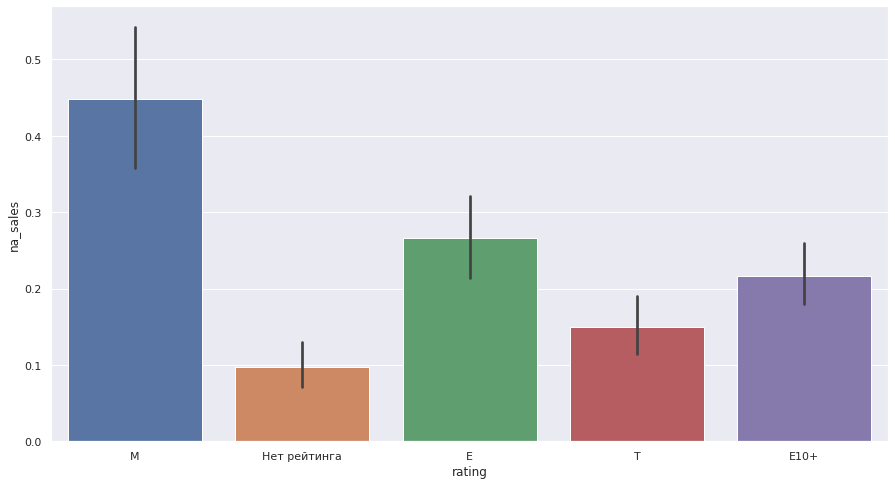

In [60]:
plt.figure(figsize=(15,8))
grid = sns.barplot(data=df, x = 'rating', y = 'na_sales') 

Больше всего игр в северной Америке продается с рейтингом:
1) «M» («Mature») — «Для взрослых»;

2) «E» («Everyone») — «Для всех»; 

3) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;

4) «T» («Teen») — «Подросткам»;

5) Без рейтинга.

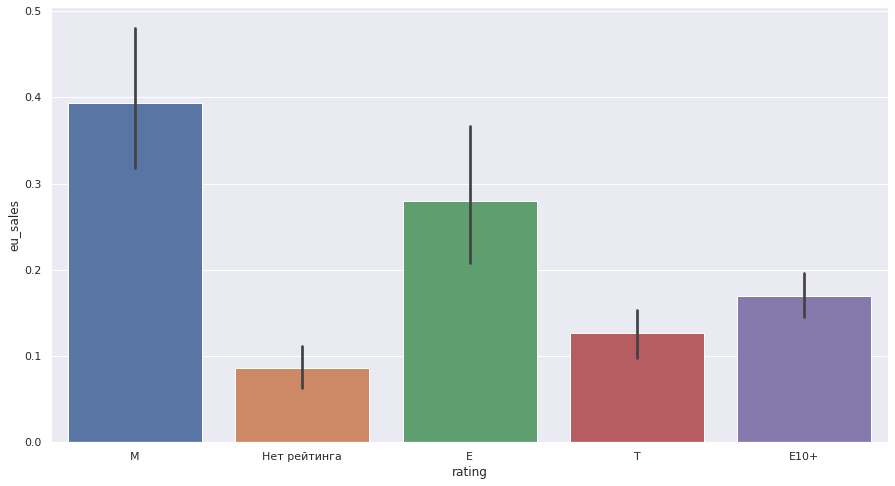

In [61]:
plt.figure(figsize=(15,8))
grid = sns.barplot(data=df, x = 'rating', y = 'eu_sales') 

Больше всего игр в Европе продается с рейтингом:
1) «M» («Mature») — «Для взрослых»;

2) «E» («Everyone») — «Для всех»; 

3) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;

4) «T» («Teen») — «Подросткам»;

5) Без рейтинга.

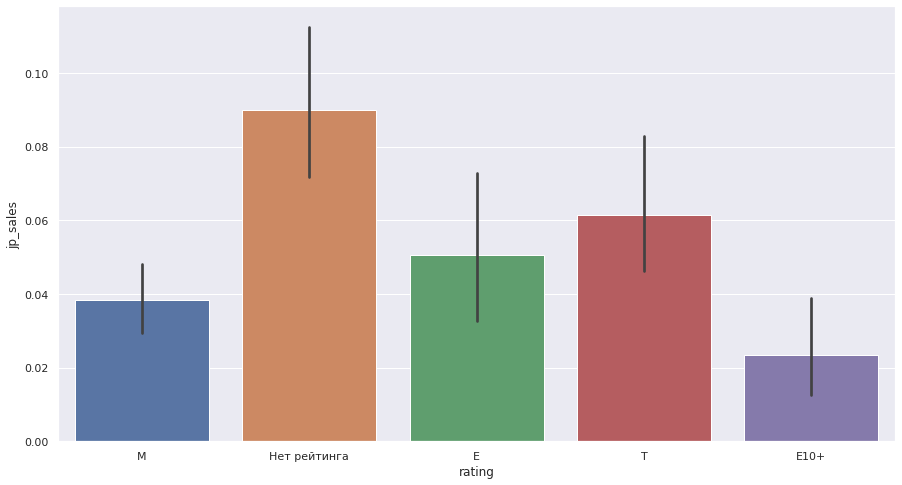

In [62]:
plt.figure(figsize=(15,8))
grid = sns.barplot(data=df, x = 'rating', y = 'jp_sales') 

Больше всего игр в Японии продается с рейтингом:
1) Без рейтинга;

2) «T» («Teen») — «Подросткам»;

3) «E» («Everyone») — «Для всех»; 

4) «M» («Mature») — «Для взрослых»;

5) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

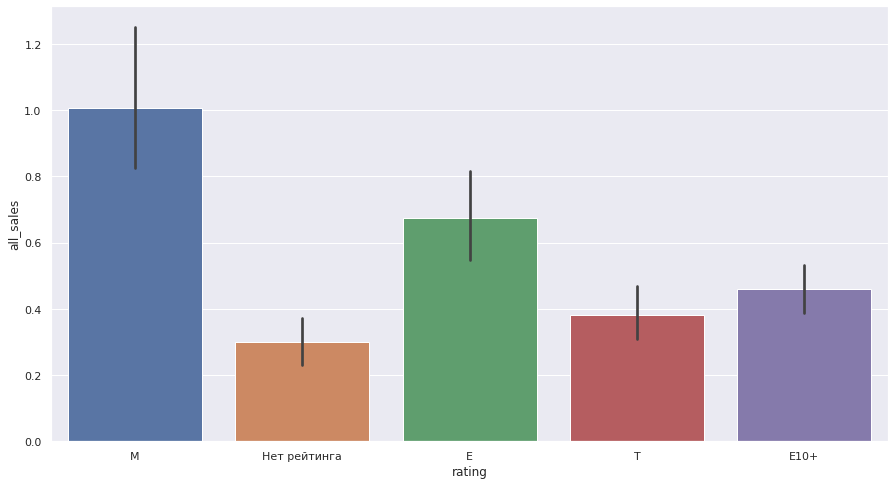

In [63]:
plt.figure(figsize=(15,8))
grid = sns.barplot(data=df, x = 'rating', y = 'all_sales') 

Больше всего игр в мире продается с рейтингом:
1) «M» («Mature») — «Для взрослых»;

2) «E» («Everyone») — «Для всех»; 

3) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;

4) «T» («Teen») — «Подросткам»;

5) Без рейтинга.

### Вывод 

Максимальные продажи у Wii, NES, GB, DS, X360, PS3 и PS2

Количество игр до 94-95 года сильно меньше, чем после 95

Оценки практически не встречаются до 96 года и их количество заметно возрастает после 2000 года

Так же данных о возрастном рейтинге практически нет до 96 года, количество данных о рейтинге заметно возрастает после 2000 года

Исходя из графиков актуальность платформ как правило не превышает 10 лет

Актуальными платформами остались только те, на которые в 2016 году выходили игры. Так же ограничили дату 2006 годом, так как актуальность платформ не превышает 10 лет и до 2000х годов данных о оценках и рейтингах крайне мало.

Продажи на всех платформах падают со временем, но у платформ 'PS4' и 'XOne' самые большие суммарные продажи в 2016, более 25 миллионов.

Между нижним и верхним квантилем находятся продажи от 0 до 150 миллионов.
Среди платформ с наибольшими продажами по квантилям:

* Wii до 150 миллионов;

* X360 lj до 125 миллионов;

* PS3 до 120 миллионов;

* PS4 до 100 миллионов;

* 3DS до 55 миллионов;

* XOne до 55 миллионов;

но у платформ продажи в 2016 сильно уменьшились, так же эти платформы относительно старые, что может свидетельствовать о уменьшающейся актуальности данных платформ.

Продажи платформ с наибольшими продажами по квантилям за 2016 год:

* Wii - 0.18 миллионов;

* X360 - 1.52 миллионов;

* PS3 - 3.60 миллионов;

* PS4 - 69.25 миллионов;

* 3DS - 15.14 миллионов;

* XOne - 26.15 миллионов;

По результатам исследования, наиболее актуальными платформами являются PS4 и XOne.


Для  PS4 и XOne, между оценкой пользователей и количеством продаж в год линейной зависимости не выявлено, а между оценкой критиков и продажами есть средняя линейная зависимость, порядка 0.4. С увеличением оценки критика как правило увеличивается количество продаж в мире.
Среди всех актуальных платформ корреляция между оценками критиков и глобальными продажами не такая высокая, как у двух первых платформ PS4 и XOne

Видно, что шкала оценок критиков 100 бальная, а шкала оценок пользователей 10 бальная.
Оценки критиков и пользователей пропущены на одинаковых платформах одновременно.

в топ 5 самых прибыльных входят жанры:

1) Shooter;

2) Sports;

3) Platform;

4) Role-Playing; 

5) Racing.


Самые не прибыльные жанры: 

1) Adventure; 

2) Strategy; 

3) Puzzle; 

4) Simulation; 

5) Action.


Самым интересным из популярных выглядит жанр Shooter, так как в рейтинге прибыльности он выше, чем в рейтинге количества. 

Среди самых не популярных наиболее интересным выглядит Fighting.

Самые популярные платформы в мире:


PS4 - 29%, PS3 - 17 %, XOne - 15%, 3DS - 13%, X360 - 13%.


Самые популярные платформы в северной Америке:


PS4 - 25%, XOne - 21%, X360 - 19%, PS3 - 15 %, 3DS - 9%.


Самые популярные платформы в Европе: 


 PS4 - 36%, PS3 - 17 %, XOne - 13%, X360 - 11%, 3DS - 8%.
 

Самые популярные платформы в Японии:


3DS - 49%, PS3 - 17%, PSV - 14%, PS4 - 12, WiiU - 8%. 


Самые популярные мире жанры: 

1) Action; 

2) Shooter; 

3) Sports;

4) Role-Playing;

5) Misc.



Самые популярные жанры в северной Америке: 

1) Action; 

2) Shooter; 

3) Sports; 

4) Role-Playing;

5) Misc.


Самые популярные прибыльные жанры в Европе: 

1) Action; 

2) Shooter; 

3) Sports; 

4) Role-Playing;

5) Racing.



Самые популярные прибыльные жанры в Японии: 

1) Role-Playing;

2) Action; 

3) Misc;

4) Fighting; 

5) Shooter.

Во Европе и северной Америке самые популярные жанры схожи, отличие только в 5ом по популярности жанре Racing и Misc соответственно.

В Японии же самые популярные жанры сильно отличаются, самым популярным является жанр Role-Playing.


Больше всего игр продается с рейтингом:

1) «M» («Mature») — «Для взрослых»;

2) «E» («Everyone») — «Для всех»;

3) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;

4) «T» («Teen») — «Подросткам»;

5) Без рейтинга.

В Японии больше всего игр продается:

1) Без рейтинга;

2) «T» («Teen») — «Подросткам»;

3) «E» («Everyone») — «Для всех»;

4) «M» («Mature») — «Для взрослых»;

5) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для проверки гипотезы, что средний пользовательский рейтинг платформ Xbox One и PC одинаковый, сформулируем нулевую гипотезу H₀, средний пользовательский рейтинг платформ Xbox One и PC одинаковый.

Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средний пользовательский рейтинг платформ Xbox One и PC различается. Это утверждение, которое принимается верным, если отбрасывается H₀.

In [64]:
#проверяем гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»
df = df.dropna()
pc_df = df.query('platform == "PC"')
xone_df = df.query('platform == "XOne"')
pc = pc_df['user_score']
xone = xone_df['user_score']
alpha = .05 
results = st.ttest_ind(
    pc, 
    xone)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1730679666731142
Не получилось отвергнуть нулевую гипотезу


Гипотеза H₀ о равенстве пользовательского рейтинга платформ Xbox One и PC не отвергнута, значит она принимается. Гипотеза H₁ о неравенстве пользовательского рейтинга платформ Xbox One и PC - отвергнута.

### Средние пользовательские рейтинги жанров Action и Sports разные

Для проверки гипотезы, что средний пользовательский рейтинг жанров Action и Sports различаются, сформулируем нулевую гипотезу H₀, что средний пользовательский рейтинг жанров Action и Sports равны.

Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средний пользовательский рейтинг жанров Action и Sports различаются. Это утверждение, которое принимается верным, если отбрасывается H₀.

In [65]:
action_df = df.query('genre == "Action"')
sports_df = df.query('genre == "Sports"')
action = action_df['user_score']
sports = sports_df['user_score']
alpha = .05 
results = st.ttest_ind(
    action, 
    sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.6842110742169437e-16
Отвергаем нулевую гипотезу


Гипотеза H₀ о равенстве пользовательского рейтинга жанров Action и Sports отвергнута, значит принимается гипотеза H₁ о неравенстве пользовательского рейтинга жанров Action и Sports.

### Вывод

Для проверки гипотезы, что средний пользовательский рейтинг платформ Xbox One и PC одинаковый, сформулировали нулевую гипотезу H₀, средний пользовательский рейтинг платформ Xbox One и PC одинаковый.
Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средний пользовательский рейтинг платформ Xbox One и PC различается. Это утверждение, которое принимается верным, если отбрасывается H₀.
p-значение: 0.1730679666731142
Не получилось отвергнуть нулевую гипотезу


Гипотеза H₀ о равенстве пользовательского рейтинга платформ Xbox One и PC не отвергнута, значит она принимается. Гипотеза H₁ о неравенстве пользовательского рейтинга платформ Xbox One и PC - отвергнута.


Для проверки гипотезы, что средний пользовательский рейтинг жанров Action и Sports различаются, сформулируем нулевую гипотезу H₀, что средний пользовательский рейтинг жанров Action и Sports равны.
Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средний пользовательский рейтинг жанров Action и Sports различаются. Это утверждение, которое принимается верным, если отбрасывается H₀.
p-значение: 1.6842110742169437e-16
Отвергаем нулевую гипотезу


Гипотеза H₀ о равенстве пользовательского рейтинга жанров Action и Sports отвергнута, значит принимается гипотеза H₁ о неравенстве пользовательского рейтинга жанров Action и Sports.

## Общий вывод

В столбцах:
* `Name`;
* `Year_of_Release`;
* `Genre`;
* `Critic_Score`;
* `User_Score`;
* `Rating`;
таблицы df обнаружены пропуски.
У столбца `User_Score` нужно сменить тип данных со строки на тип float.
Так же во всех столбцах с типом float64, можно сменить тип на float32 для экономии памяти.
Наименование столбцов несоответствующее, используется верхний регистр.

* Заменили типа столбца `user_score` на float32;
* Заменили значения tbd в столбце `user_score` на пропуски, т.к. tbd - это отсутствие оценки;
* Заменили тип данных столбцов с float64, на float32;
* Посчитали суммарные продажи в мире в столбеце `all_sales`.
Значимое количество пропусков в столбцах с оценками игр `critic_score`, `user_score` и возрастным рейтингом `rating`. Заполнять оценки игр средними или медианными значениями бессмыслено, так как оценки зависят только от конкретной игры. Остальные пропуски не более 2% можно не заполнять.
Скорее всего пропуски в столбцах `critic_score`, `user_score` и `rating` вызваны тем, что до определенного момента не существовало практики выставелния и подсчета оценки игр и возрастного рейтинга игр.

Максимальные продажи у Wii, NES, GB, DS, X360, PS3 и PS2

Количество игр до 94-95 года сильно меньше, чем после 95

Оценки практически не встречаются до 96 года и их количество заметно возрастает после 2000 года

Так же данных о возрастном рейтинге практически нет до 96 года, количество данных о рейтинге заметно возрастает после 2000 года

Исходя из графиков актуальность платформ как правило не превышает 10 лет

Актуальными платформами остались только те, на которые в 2016 году выходили игры. Так же ограничили дату 2006 годом, так как актуальность платформ не превышает 10 лет и до 2000х годов данных о оценках и рейтингах крайне мало.

Продажи на всех платформах падают со временем, но у платформ 'PS4' и 'XOne' самые большие суммарные продажи в 2016, более 25 миллионов.

Между нижним и верхним квантилем находятся продажи от 0 до 150 миллионов.
Среди платформ с наибольшими продажами по квантилям:

* Wii до 150 миллионов;

* X360 lj до 125 миллионов;

* PS3 до 120 миллионов;

* PS4 до 100 миллионов;

* 3DS до 55 миллионов;

* XOne до 55 миллионов;

но у платформ продажи в 2016 сильно уменьшились, так же эти платформы относительно старые, что может свидетельствовать о уменьшающейся актуальности данных платформ.

Продажи платформ с наибольшими продажами по квантилям за 2016 год:

* Wii - 0.18 миллионов;

* X360 - 1.52 миллионов;

* PS3 - 3.60 миллионов;

* PS4 - 69.25 миллионов;

* 3DS - 15.14 миллионов;

* XOne - 26.15 миллионов;

По результатам исследования, наиболее актуальными платформами являются PS4 и XOne.


Для  PS4 и XOne, между оценкой пользователей и количеством продаж в год линейной зависимости не выявлено, а между оценкой критиков и продажами есть средняя линейная зависимость, порядка 0.4. С увеличением оценки критика как правило увеличивается количество продаж в мире.
Среди всех актуальных платформ корреляция между оценками критиков и глобальными продажами не такая высокая, как у двух первых платформ PS4 и XOne

Видно, что шкала оценок критиков 100 бальная, а шкала оценок пользователей 10 бальная.
Оценки критиков и пользователей пропущены на одинаковых платформах одновременно.

в топ 5 самых прибыльных входят жанры:

1) Shooter;

2) Sports;

3) Platform;

4) Role-Playing; 

5) Racing.


Самые не прибыльные жанры: 

1) Adventure; 

2) Strategy; 

3) Puzzle; 

4) Simulation; 

5) Action.


Самым интересным из популярных выглядит жанр Shooter, так как в рейтинге прибыльности он выше, чем в рейтинге количества. 

Среди самых не популярных наиболее интересным выглядит Fighting.

Самые популярные платформы в мире:


PS4 - 29%, PS3 - 17 %, XOne - 15%, 3DS - 13%, X360 - 13%.


Самые популярные платформы в северной Америке:


PS4 - 25%, XOne - 21%, X360 - 19%, PS3 - 15 %, 3DS - 9%.


Самые популярные платформы в Европе: 


 PS4 - 36%, PS3 - 17 %, XOne - 13%, X360 - 11%, 3DS - 8%.
 

Самые популярные платформы в Японии:


3DS - 49%, PS3 - 17%, PSV - 14%, PS4 - 12, WiiU - 8%. 


Самые популярные мире жанры: 

1) Action; 

2) Shooter; 

3) Sports;

4) Role-Playing;

5) Misc.



Самые популярные жанры в северной Америке: 

1) Action; 

2) Shooter; 

3) Sports; 

4) Role-Playing;

5) Misc.


Самые популярные прибыльные жанры в Европе: 

1) Action; 

2) Shooter; 

3) Sports; 

4) Role-Playing;

5) Racing.



Самые популярные прибыльные жанры в Японии: 

1) Role-Playing;

2) Action; 

3) Misc;

4) Fighting; 

5) Shooter.

Во Европе и северной Америке самые популярные жанры схожи, отличие только в 5ом по популярности жанре Racing и Misc соответственно.

В Японии же самые популярные жанры сильно отличаются, самым популярным является жанр Role-Playing.


Больше всего игр продается с рейтингом:

1) «M» («Mature») — «Для взрослых»;

2) «E» («Everyone») — «Для всех»;

3) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;

4) «T» («Teen») — «Подросткам»;

5) Без рейтинга.

В Японии больше всего игр продается:

1) Без рейтинга;

2) «T» («Teen») — «Подросткам»;

3) «E» («Everyone») — «Для всех»;

4) «M» («Mature») — «Для взрослых»;

5) «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».


Для проверки гипотезы, что средний пользовательский рейтинг платформ Xbox One и PC одинаковый, сформулировали нулевую гипотезу H₀, средний пользовательский рейтинг платформ Xbox One и PC одинаковый.


Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средний пользовательский рейтинг платформ Xbox One и PC различается. Это утверждение, которое принимается верным, если отбрасывается H₀.

p-значение: 0.1730679666731142
Не получилось отвергнуть нулевую гипотезу


Гипотеза H₀ о равенстве пользовательского рейтинга платформ Xbox One и PC не отвергнута, значит она принимается. Гипотеза H₁ о неравенстве пользовательского рейтинга платформ Xbox One и PC - отвергнута.


Для проверки гипотезы, что средний пользовательский рейтинг жанров Action и Sports различаются, сформулируем нулевую гипотезу H₀, что средний пользовательский рейтинг жанров Action и Sports равны.


Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средний пользовательский рейтинг жанров Action и Sports различаются. Это утверждение, которое принимается верным, если отбрасывается H₀.

p-значение: 1.6842110742169437e-16
Отвергаем нулевую гипотезу


Гипотеза H₀ о равенстве пользовательского рейтинга жанров Action и Sports отвергнута, значит принимается гипотеза H₁ о неравенстве пользовательского рейтинга жанров Action и Sports.